In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("CBS_2021-2023_Full .csv")

In [3]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [4]:
# Drop all rows with any NaN values
df= df.dropna()

In [5]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [6]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [7]:
df['Month'] = df['started_at'].dt.strftime('%B')
df["year"]=df["started_at"].dt.year
df["start_hour"]=df["started_at"].dt.hour
df["end_hour"]=df["ended_at"].dt.hour
df["day"] = df["started_at"].dt.day
df["day of week"] = df["started_at"].dt.strftime("%A")
df["date_is_weekend"] = np.where(df["day of week"].isin([5, 6]),1,0)

In [8]:
# Calculate trip duration in seconds
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

In [9]:
df['time_of_day'] = df['start_hour'].apply(lambda value: 'Morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'Afternoon' if value in (12,13,14,15,16)
                                                        else 'Evening' if value in (17,18,19,20,21) 
                                                        else 'Night')

df['time_of_day'] = pd.Categorical(df['time_of_day'],
categories=["Morning","Afternoon","Evening","Night"])

In [10]:
# Calculate total rides
total_rides = len(df)

# Calculate casual rides
casual_rides = len(df[df['member_casual'] == 'casual'])

# Calculate casual rider percentage
casual_rider_percentage = (casual_rides / total_rides) * 100

print(f"Casual Rider Percentage: {casual_rider_percentage:.2f}%")

Casual Rider Percentage: 39.37%


In [11]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        'Autumn'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
df['Season'] = df['Month'].apply(get_season)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Month,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,Season
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,2021,0,0,1,Friday,0,1520.0,Night,Winter
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,2021,0,0,1,Friday,0,853.0,Night,Winter
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,January,2021,0,0,1,Friday,0,335.0,Night,Winter
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,January,2021,0,0,1,Friday,0,194.0,Night,Winter
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,January,2021,0,0,1,Friday,0,1042.0,Night,Winter


In [12]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'Season'],
      dtype='object')

In [13]:
rides_per_month = df.groupby(['year', 'Month'])['trip_duration'].sum().reset_index()
rides_by_user = df.groupby('member_casual')['trip_duration'].sum()
hourly_usage = df.groupby('Season')['trip_duration'].mean()
print(rides_per_month)
print(rides_by_user)
print(hourly_usage)

    year      Month  trip_duration
0   2021      April    316045472.0
1   2021     August    314565184.0
2   2021   December    183714719.0
3   2021   February     71391294.0
4   2021    January    108611527.0
5   2021       July    450712394.0
6   2021       June    384609760.0
7   2021      March    244835816.0
8   2021        May    347227222.0
9   2021   November    244186936.0
10  2021    October    394713012.0
11  2021  September    352183747.0
12  2022      April    404043198.0
13  2022     August    463233859.0
14  2022   December    154320556.0
15  2022   February    141004232.0
16  2022    January     85988375.0
17  2022       July    527092484.0
18  2022       June    519254857.0
19  2022      March    320952843.0
20  2022        May    420148807.0
21  2022   November    273873681.0
22  2022    October    378760265.0
23  2022  September    438852383.0
24  2023      April    448176241.0
25  2023     August    472179553.0
26  2023   December    187012450.0
27  2023   February 

In [14]:
# Group by month and calculate casual rider percentage for each month
monthly_casual_ridership = df.groupby(['year', 'Month'])['member_casual'].apply(lambda x: (x == 'casual').sum() / len(x) * 100).reset_index(name='casual_percentage')

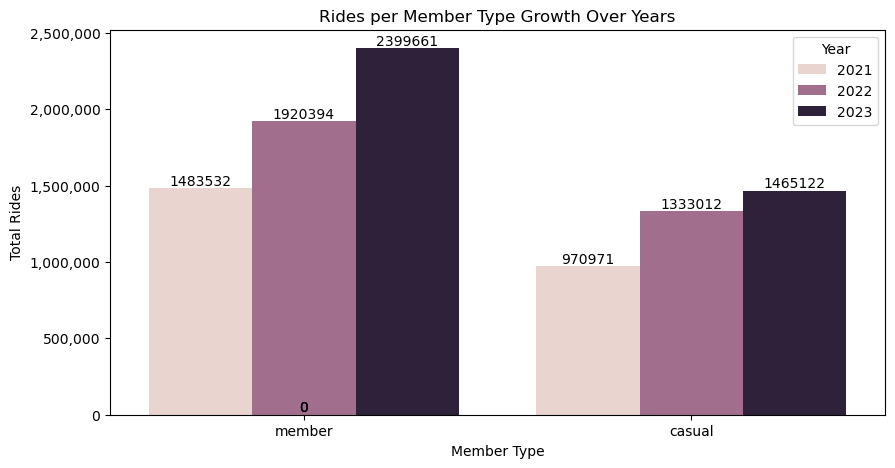

In [15]:
from matplotlib.ticker import FuncFormatter
# Create the countplot
plt.figure(figsize=(10, 5))
plt.title('Rides per Member Type Growth Over Years')
# Create the countplot
ax = sns.countplot(data=df, x='member_casual', hue='year')

# Annotate the count values (y-axis numbers) on top of the bars
for p in ax.patches:
    # Get the height of each bar (this is the count)
    height = p.get_height()

    # Get the x position of the bar (center of the bar)
    x_position = p.get_x() + p.get_width() / 2

    # Place the count value above the bar
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Member Type')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
# Use FuncFormatter to format the y-axis to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Add commas for thousands separation

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

In [16]:
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Month,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,Season
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,2021,0,0,1,Friday,0,1520.0,Night,Winter
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,2021,0,0,1,Friday,0,853.0,Night,Winter


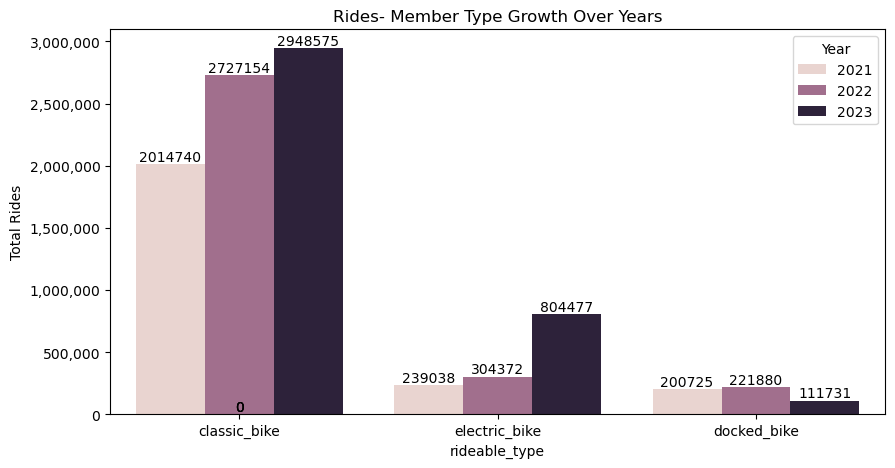

In [61]:
plt.figure(figsize=(10, 5))
plt.title('Rides- Member Type Growth Over Years')
ax = sns.countplot(data=df, x='rideable_type', hue='year')
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('rideable_type')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
def format_func(value, tick_number):
    return f'{int(value):,}' 

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

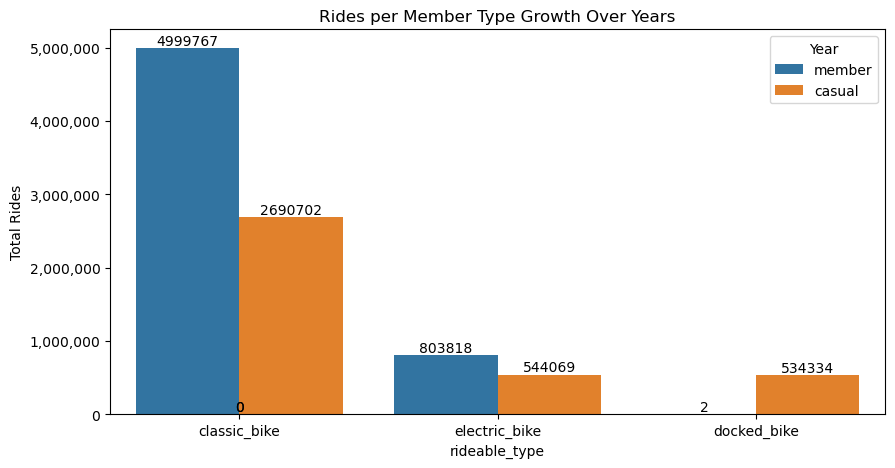

In [18]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10, 5))
plt.title('Rides per Member Type Growth Over Years')

ax = sns.countplot(data=df, x='rideable_type', hue='member_casual')
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('rideable_type')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
def format_func(value, tick_number):
    return f'{int(value):,}' 

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

In [22]:
# 1. Identify casual riders who took multiple rides (potential for conversion)
frequent_casual = df[df['member_casual'] == 'casual'].groupby('ride_id').size().reset_index(name='ride_count')
frequent_casual = frequent_casual[frequent_casual['ride_count'] > 2]  # Example: More than 2 rides

In [23]:
# 2. Analyze their riding patterns (where they start/end, time of day, etc.)
frequent_casual_data = df[df['ride_id'].isin(frequent_casual['ride_id'])]

In [25]:
# Popular start stations for frequent casual riders
popular_start_stations = frequent_casual_data['start_station_name'].value_counts().head(10)
print("Popular Start Stations for Frequent Casual Riders:\n", popular_start_stations)


Popular Start Stations for Frequent Casual Riders:
 Series([], Name: count, dtype: int64)


In [26]:
# Time of day they ride
time_of_day_usage = frequent_casual_data['time_of_day'].value_counts().sort_index()
print("\nTime of Day Usage for Frequent Casual Riders:\n", time_of_day_usage)


Time of Day Usage for Frequent Casual Riders:
 time_of_day
Morning      0
Afternoon    0
Evening      0
Night        0
Name: count, dtype: int64


In [27]:
# Group by member and month, count rides
member_trips = df[df['member_casual'] == 'member'].groupby(['ride_id', 'Month','year']).size().reset_index(name='trip_count')

In [28]:
# Calculate average trips per member per month
average_member_trips = member_trips.groupby('ride_id')['trip_count'].mean().mean()  # Average of averages
print(f"Average Member Trips per Month: {average_member_trips:.2f}")

Average Member Trips per Month: 1.00


In [30]:
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Month,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,Season
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,2021,0,0,1,Friday,0,1520.0,Night,Winter
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,2021,0,0,1,Friday,0,853.0,Night,Winter


In [31]:
#Trips by day of week for members
member_trips_dayofweek = df[df['member_casual'] == 'member']['day of week'].value_counts().sort_index()
print("\nMember Trips by Day of Week:\n", member_trips_dayofweek)



Member Trips by Day of Week:
 day of week
Friday       828019
Monday       790968
Saturday     778307
Sunday       685727
Thursday     896009
Tuesday      900658
Wednesday    923899
Name: count, dtype: int64


In [32]:
# Casual Rider Repeat Rate by Location:

casual_rides = df[df['member_casual'] == 'casual']
casual_rides['start_station_name'].replace('', np.nan, inplace=True)
casual_rides['end_station_name'].replace('', np.nan, inplace=True)
repeat_riders = casual_rides.groupby(['ride_id', 'start_station_name']).size().reset_index(name='ride_count')
repeat_riders = repeat_riders[repeat_riders['ride_count'] > 1]  # Riders using the same start station more than once

repeat_rate_by_location = repeat_riders.groupby('start_station_name')['ride_id'].count() / casual_rides['start_station_name'].value_counts() * 100
print("Casual Rider Repeat Rate by Location:\n", repeat_rate_by_location)


Casual Rider Repeat Rate by Location:
 start_station_name
10th & E St NW                                         NaN
10th & Florida Ave NW                                  NaN
10th & G St NW                                         NaN
10th & H St NE                                         NaN
10th & K St NW                                         NaN
                                                        ..
Woodglen Dr & Executive Blvd                           NaN
Woodley Park Metro / Calvert St & Connecticut Ave NW   NaN
Woodmont Ave & Strathmore St                           NaN
Woody Ward Rec Center                                  NaN
Yuma St & Tenley Circle NW                             NaN
Length: 851, dtype: float64


In [33]:
# Station Popularity Index for Casual Riders:

station_popularity = casual_rides['start_station_name'].value_counts()
print("\nStation Popularity Index for Casual Riders:\n", station_popularity)


Station Popularity Index for Casual Riders:
 start_station_name
Lincoln Memorial                                         80187
Jefferson Dr & 14th St SW                                71665
Henry Bacon Dr & Lincoln Memorial Circle NW              63350
4th St & Madison Dr NW                                   63227
Smithsonian-National Mall / Jefferson Dr & 12th St SW    60550
                                                         ...  
Tyco Rd & Boyd Pointe Way                                    3
Route 29 & Circle Woods Dr                                   3
South St & University Dr                                     2
Dorr Ave & Prosperity Ave                                    2
N Moore St & Rosslyn Metro                                   1
Name: count, Length: 851, dtype: int64


In [34]:
# Distance Traveled by Casual vs. Members:

# Calculate distance (Haversine formula for more accuracy)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance


In [35]:
df['distance'] = df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

In [36]:
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,Season,distance
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,2021,0,0,1,Friday,0,1520.0,Night,Winter,4.367593
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,2021,0,0,1,Friday,0,853.0,Night,Winter,1.138843


In [37]:
distance_comparison = df.groupby('member_casual')['distance'].agg(['mean', 'median'])
print("\nDistance Traveled by Casual vs. Members:\n", distance_comparison)


Distance Traveled by Casual vs. Members:
                    mean    median
member_casual                    
casual         1.918798  1.614827
member         1.799418  1.468425


In [38]:
# Frequent Casual Riders:
frequent_casuals = casual_rides.groupby('ride_id').size().reset_index(name='ride_count')
frequent_casuals = frequent_casuals[frequent_casuals['ride_count'] > 5]  # Example: More than 5 rides
print("\nFrequent Casual Riders (Potential Upsell):\n", frequent_casuals)



Frequent Casual Riders (Potential Upsell):
 Empty DataFrame
Columns: [ride_id, ride_count]
Index: []


In [41]:
# Casual Riders in High-Traffic Areas:
high_traffic_stations = station_popularity.nlargest(10)  # Top 10 stations
casuals_in_high_traffic = casual_rides[casual_rides['start_station_name'].isin(high_traffic_stations.index)]
print("\nCasual Riders in High-Traffic Areas:\n", casuals_in_high_traffic)


Casual Riders in High-Traffic Areas:
                    ride_id  rideable_type          started_at  \
11        DA579474AAD89387   classic_bike 2021-01-01 00:24:12   
12        1DE392338FF58AC7   classic_bike 2021-01-01 00:24:12   
13        64D4C859EC0B8D60   classic_bike 2021-01-01 00:24:42   
18        6B4631D4B1BCB9BB    docked_bike 2021-01-01 00:26:51   
30        3AF0E3F8583D6852   classic_bike 2021-01-01 00:44:19   
...                    ...            ...                 ...   
10693752  3FBECC31ECFC3F3F   classic_bike 2023-12-31 22:43:44   
10693757  57A7E83299DF30A4   classic_bike 2023-12-31 22:44:57   
10693978  4D7FF686D6A88D8E   classic_bike 2023-12-31 23:51:24   
10693981  38EB172B69A41D54  electric_bike 2023-12-31 23:52:37   
10693986  96C983C421336CD7   classic_bike 2023-12-31 23:54:49   

                    ended_at  \
11       2021-01-01 00:47:47   
12       2021-01-01 00:47:54   
13       2021-01-01 00:48:47   
18       2021-01-01 00:47:48   
30       2021-01-01 

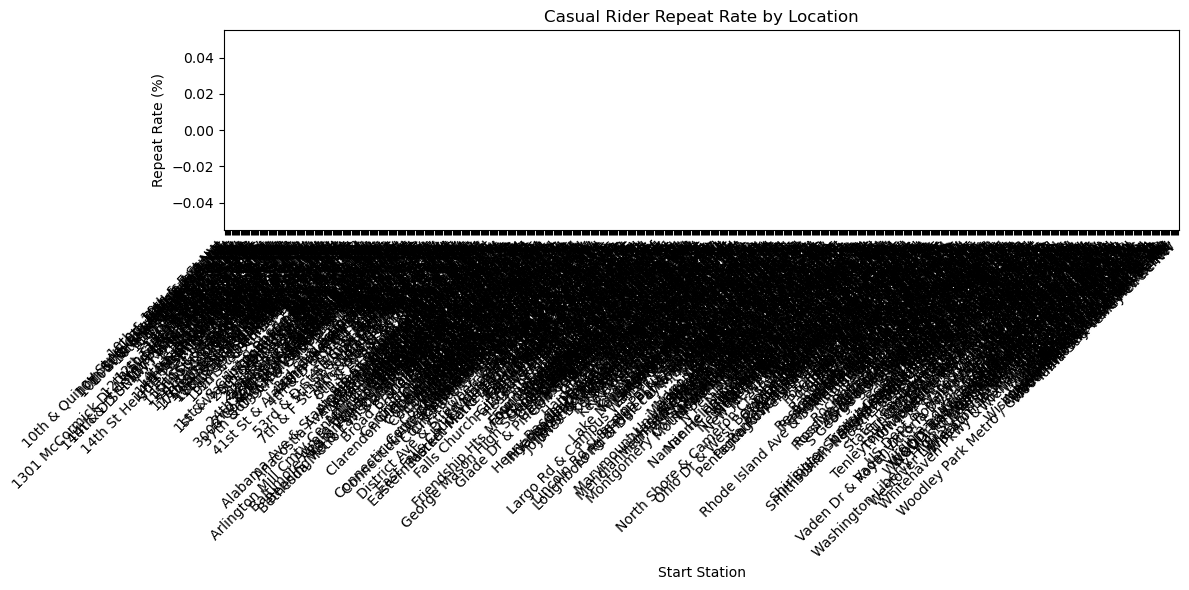

In [42]:
# Visualizing repeat rate by location
plt.figure(figsize=(12, 6))
repeat_rate_by_location.plot(kind='bar')
plt.title('Casual Rider Repeat Rate by Location')
plt.xlabel('Start Station')
plt.ylabel('Repeat Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


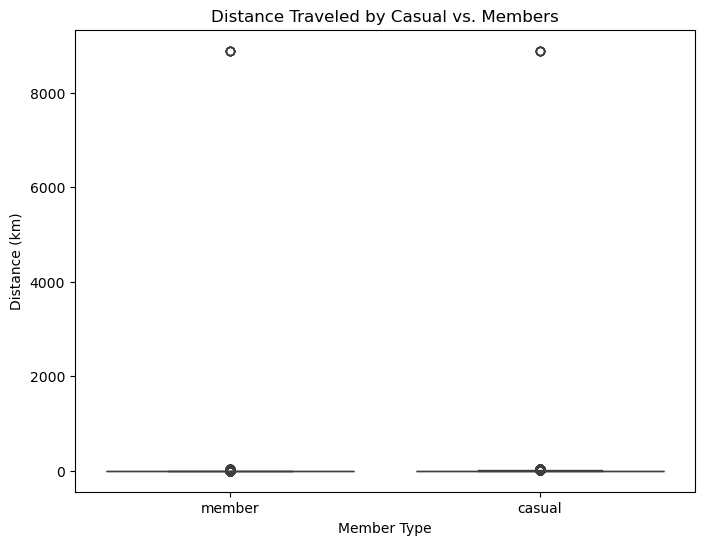

In [43]:
# Example: Visualizing distance comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_casual', y='distance', data=df)
plt.title('Distance Traveled by Casual vs. Members')
plt.xlabel('Member Type')
plt.ylabel('Distance (km)')
plt.show()

In [67]:
df['trip_duration'] = pd.to_numeric(df['trip_duration'], errors='coerce')
# KPIs
total_rides = df.shape[0]
avg_trip_duration = df['trip_duration'].mean()

rides_by_member_type = df['member_casual'].value_counts()

rides_by_time_of_day = df['time_of_day'].value_counts()

rides_by_season = df['Season'].value_counts()

peak_start_hour = df['start_hour'].value_counts().idxmax()

peak_end_hour = df['end_hour'].value_counts().idxmax()   

In [65]:
# Weekend vs. Weekday Usage
weekend_rides = df[df['date_is_weekend'] == True].shape[0]
weekday_rides = df[df['date_is_weekend'] == False].shape[0]

In [63]:
# Top start and end stations
top_start_stations = df['start_station_name'].value_counts().head(5)
top_end_stations = df['end_station_name'].value_counts().head(5)

In [69]:
# Print KPIs
print(f"Total Rides: {total_rides}")
print(f"Average Trip Duration: {avg_trip_duration:.2f} minutes")

Total Rides: 9572692
Average Trip Duration: 1238.92 minutes


In [70]:
print("Rides by Member Type:")
print(rides_by_member_type)

Rides by Member Type:
member_casual
member    5803587
casual    3769105
Name: count, dtype: int64


In [71]:
print("Rides by Time of Day:")
print(rides_by_time_of_day)
print("Rides by Season:")
print(rides_by_season)

Rides by Time of Day:
time_of_day
Afternoon    3188193
Evening      3187110
Morning      2555087
Night         642302
Name: count, dtype: int64
Rides by Season:
Season
Summer    3048591
Spring    2383750
Winter    1327608
Name: count, dtype: int64


In [72]:
print(f"Peak Start Hour: {peak_start_hour}")
print(f"Peak End Hour: {peak_end_hour}")

Peak Start Hour: 17
Peak End Hour: 17


In [75]:
print(f"Weekend Rides: {weekend_rides}, Weekday Rides: {weekday_rides}")

Weekend Rides: 0, Weekday Rides: 9572692


In [76]:
print("Top 5 Start Stations:")
print(top_start_stations)

Top 5 Start Stations:
start_station_name
New Hampshire Ave & T St NW        102179
Columbus Circle / Union Station    100584
Lincoln Memorial                    96667
15th & P St NW                      95670
Jefferson Dr & 14th St SW           88078
Name: count, dtype: int64


In [77]:
print("Top 5 End Stations:")
print(top_end_stations)

Top 5 End Stations:
end_station_name
Columbus Circle / Union Station    102410
New Hampshire Ave & T St NW        100880
15th & P St NW                      96758
Lincoln Memorial                    95439
Jefferson Dr & 14th St SW           91470
Name: count, dtype: int64


In [48]:
repeat_riders_type = repeat_riders.groupby('rideable_type')['ride_id'].count()
print("\nRepeat Riders by Rideable Type:\n", repeat_riders_type)

# Visualization:
plt.figure(figsize=(8, 6))
repeat_riders_type.plot(kind='bar')
plt.title('Repeat Riders by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Repeat Riders')
plt.show()

KeyError: 'rideable_type'


Repeat Riders Time of Day and Day of Week:
 Empty DataFrame
Columns: []
Index: []


<Figure size 1000x800 with 0 Axes>

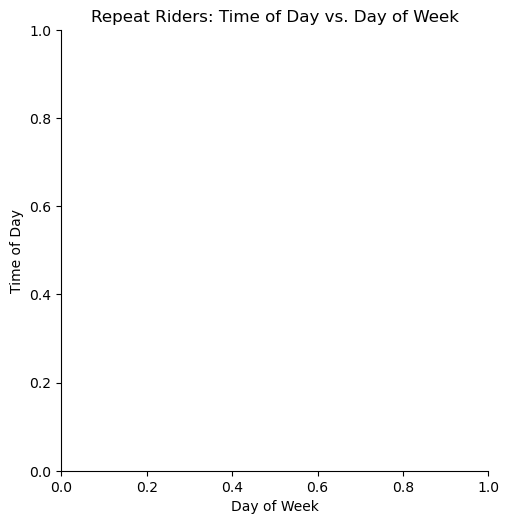

In [60]:
repeat_riders_time = casual_rides[casual_rides['ride_id'].isin(repeat_riders['ride_id'])].groupby(['time_of_day', 'day of week'])['ride_id'].count().unstack()
print("\nRepeat Riders Time of Day and Day of Week:\n", repeat_riders_time)

# Visualization (heatmap):
plt.figure(figsize=(10, 8))
sns.catplot(repeat_riders_time)
plt.title('Repeat Riders: Time of Day vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')
plt.show()

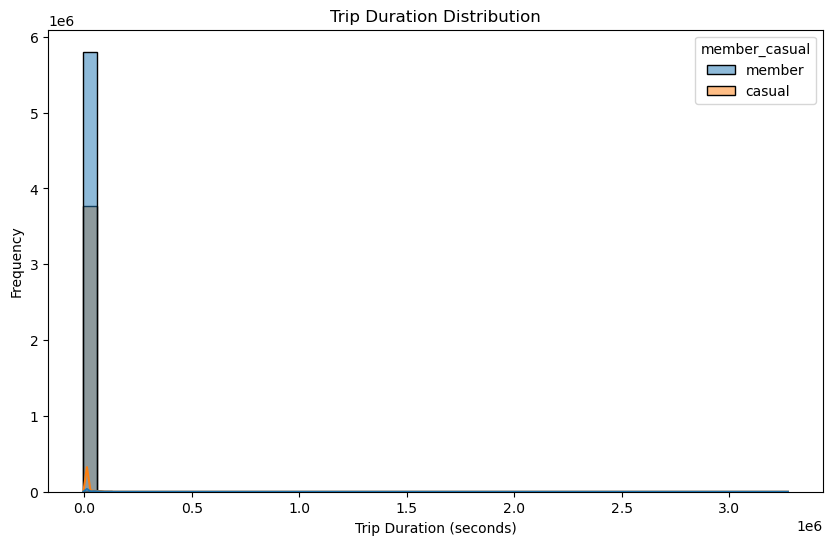

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='trip_duration', hue='member_casual', kde=True, bins=50)  # Adjust bins as needed
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

Station Usages in Morning Time

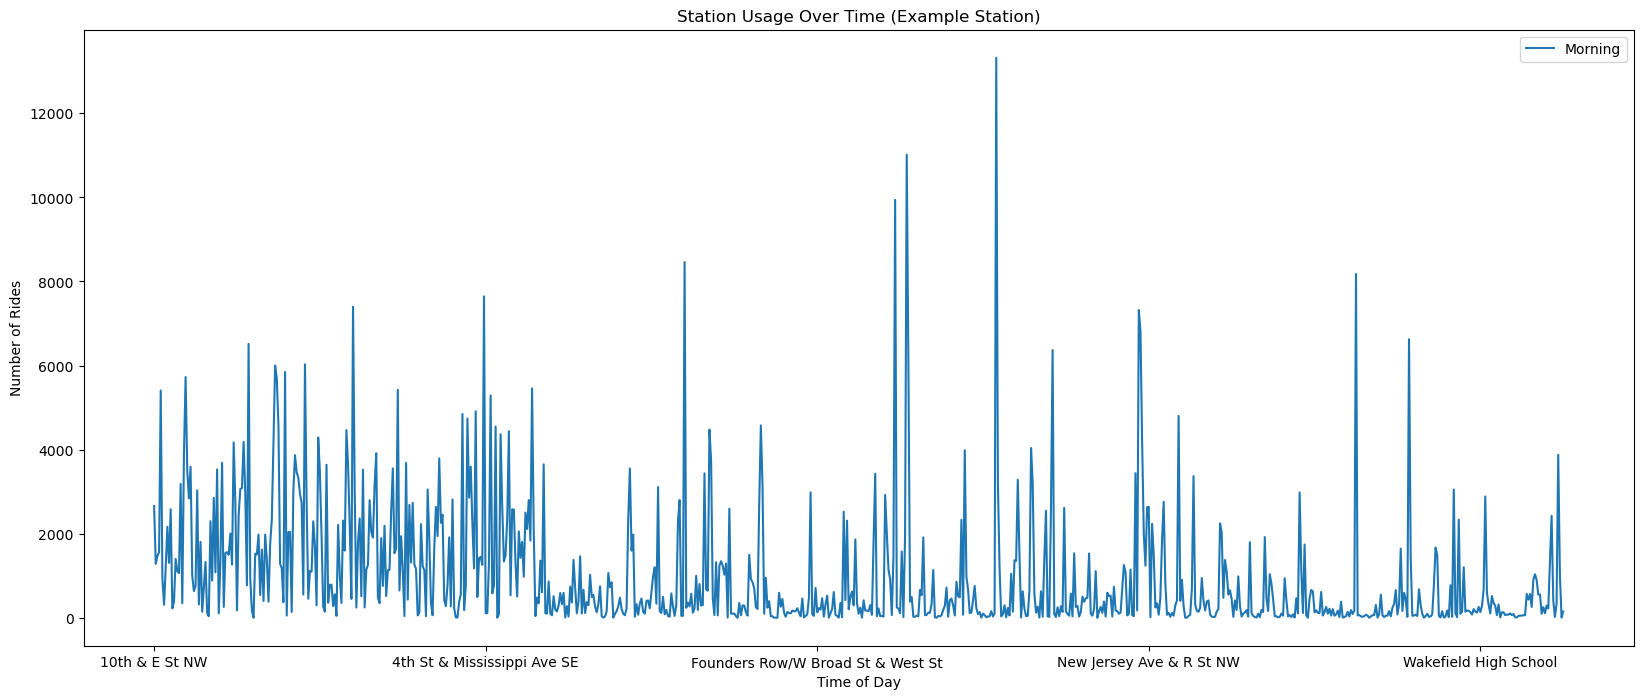

In [57]:
station_usage_over_time = casual_rides.groupby(['start_station_name', 'time_of_day'])['ride_id'].count().unstack()

# Visualization (example for one station - repeat for other key stations):
plt.figure(figsize=(20, 8))
station_usage_over_time['Morning'].plot(label='Morning') #Example time of day
# station_usage_over_time['Afternoon'].plot(label='Afternoon') #Example time of day
plt.title('Station Usage Over Time (Example Station)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

Station Usages in Afternoon Time

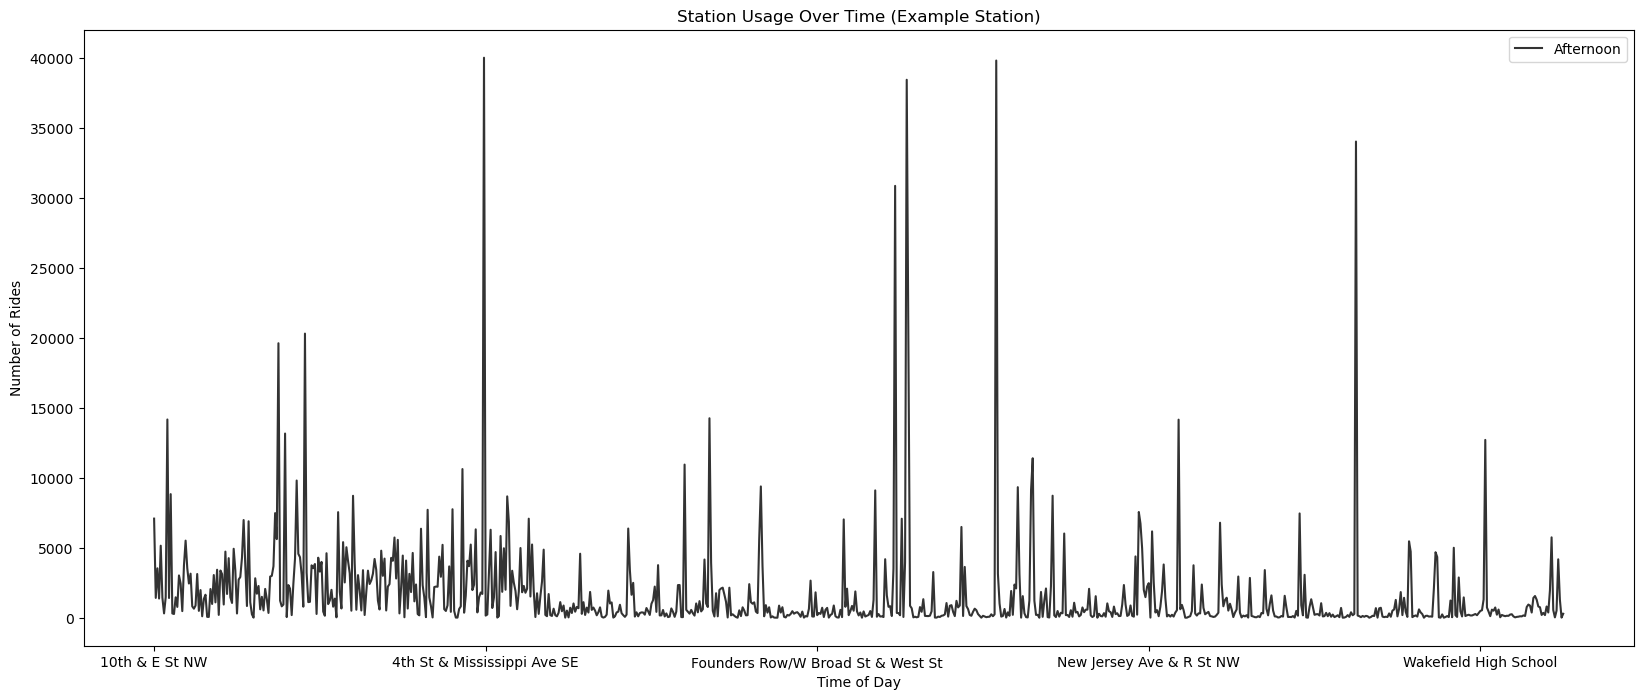

In [59]:
station_usage_over_time = casual_rides.groupby(['start_station_name', 'time_of_day'])['ride_id'].count().unstack()

# Visualization (example for one station - repeat for other key stations):
plt.figure(figsize=(20, 8))
# station_usage_over_time['Morning'].plot(label='Morning') #Example time of day
station_usage_over_time['Afternoon'].plot(label='Afternoon', color= '.2') #Example time of day
plt.title('Station Usage Over Time (Example Station)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

KPI 

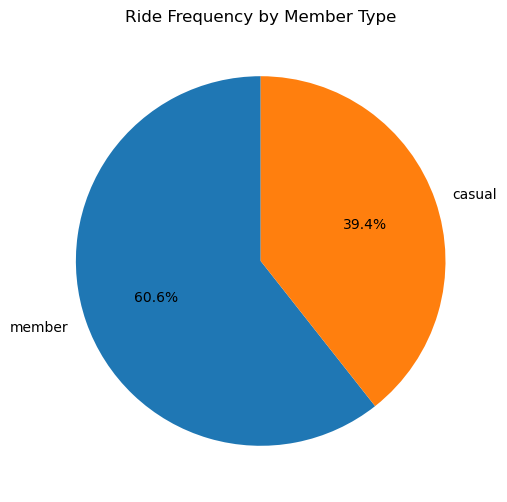

In [54]:

# 1. Ride Frequency
ride_counts = df['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Ride Frequency by Member Type")
plt.show()


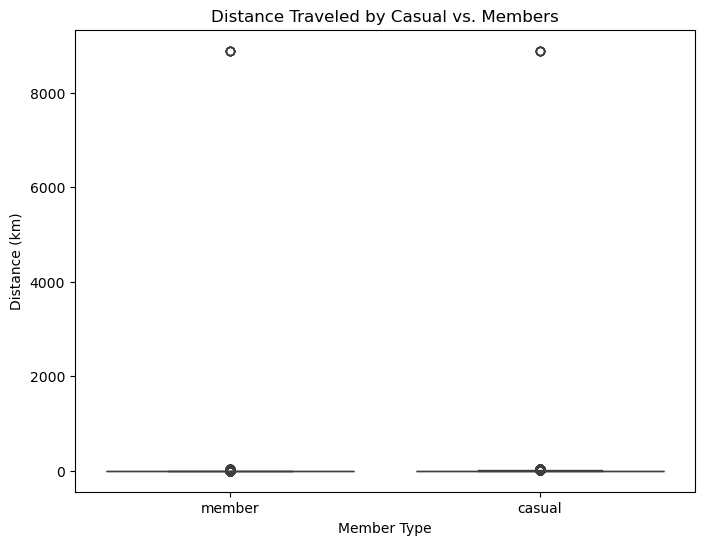

In [55]:
# Example: Distance Comparison (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_casual', y='distance', data=df)
plt.title('Distance Traveled by Casual vs. Members')
plt.xlabel('Member Type')
plt.ylabel('Distance (km)')
plt.show()


In [56]:
# Example: Visualizing Repeat Riders Time of Day and Day of Week (Heatmap)
repeat_riders_time = casual_rides[casual_rides['ride_id'].isin(repeat_riders['ride_id'])].groupby(['time_of_day', 'day of week'])['ride_id'].count().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(repeat_riders_time, cmap="YlGnBu")
plt.title('Repeat Riders: Time of Day vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>